In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [43]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.acceptance import f_decline, f_decline_R50, f_decline_R75, f_decline_R100, f_decline_mixed, f_mode
from MaaSSim.acceptance import RA_kpi_veh, RA_kpi_pax

In [4]:
import osmnx as ox
import networkx as nx
import random
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns
import folium
import h3

In [9]:
params = MaaSSim.utils.get_config('glance.json')
params.vehicle_fixed_positions = True
params.times.patience = 180 #in second 600
params.dist_threshold = 20000 #in meter
params.dist_threshold_min = 3000
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"

params.d2d.fuel_cost = 0.25 #euro/km
params.platforms.comm_rate = 0
params.platforms.base_fare = 2
params.platforms.fare = 1.2 
params.platforms.min_fare = 2
params.speeds.ride=10
params.times.decline=20
params.assert_me = False

params.paths.requests = 'Amsterdam_requests_new.csv'
params.dynamic_paricing = 'On'
params.zoning_level = 7
params.seed = 1

params.nP = 3
params.nV = 3
params.start_time = pd.Timestamp('1900-01-01 08:00:00')
params.simTime = 8
params.end_time = params.start_time + pd.Timedelta(int(params.simTime), 'h')
# params.end_time = pd.Timestamp('1900-01-01 16:00:00')


pd.set_option('display.max_rows', 100)

In [40]:
RD = [-0.43, -0.31, -0.47, -0.47, -0.33, -0.60, -0.80, -0.99, -0.99, -0.99, -0.99, -0.99, -0.34
      , -0.34, -0.34, -0.34, -0.34, -0.34, -0.34, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61,
      -0.61, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61]
SMP = list(np.arange(1.2, 5.1, 0.1))

pr = [100]
smp = [1]

for i in range(0,len(RD)):
    dp = (SMP[i]-smp[-1])/smp[-1]
    dd = dp*(RD[i])
    pr.append((1+dd)*pr[-1])
    smp.append(SMP[i])
    
surge_dict = {}
for i in range(0, len(smp)):
    surge_dict[smp[i]] = pr[i]
surge_dict[1.1] = (surge_dict[1] + surge_dict[1.2])/2
    
surge_dict

{1: 100,
 1.2: 91.4,
 1.3: 89.03883333333333,
 1.4000000000000001: 85.81973705128205,
 1.5000000000000002: 82.93864587884615,
 1.6000000000000003: 81.11399566951152,
 1.7000000000000004: 78.07222083190484,
 1.8000000000000005: 74.39823396922696,
 1.9000000000000006: 70.30633110091948,
 2.000000000000001: 66.64300121723998,
 2.1000000000000005: 63.34417265698662,
 2.200000000000001: 60.35794737458581,
 2.3000000000000007: 57.64183974272946,
 2.4000000000000012: 56.78974298131519,
 2.500000000000001: 55.98522162241323,
 2.6000000000000014: 55.22382260834841,
 2.700000000000001: 54.5016649280854,
 2.8000000000000016: 53.81534766602802,
 2.9000000000000012: 53.16187558722625,
 3.0000000000000018: 52.53859842516911,
 3.1000000000000014: 51.470313590524015,
 3.200000000000002: 50.45751064567821,
 3.3000000000000016: 49.49566434899498,
 3.400000000000002: 48.58074449284689,
 3.5000000000000018: 47.70914878282817,
 3.6000000000000023: 46.87764647547031,
 3.700000000000002: 46.08333079908039,
 

In [45]:
sim = MaaSSim.simulators.simulate(params=params, f_trav_mode=f_mode, f_driver_decline=f_decline, kpi_pax=RA_kpi_pax, kpi_veh=RA_kpi_veh)

25-10-22 15:07:55-WARNING-Setting up 8h simulation at 1900-01-01 10:44:00 for 3 vehicles and 3 passengers in Amsterdam, Netherlands
25-10-22 15:07:57-INFO--------------------	Starting simulation	-------------------
purchase_rate=  100
25-10-22 15:07:57-INFO-pax    0  got to dest at                           1900-01-01 10:53:42
25-10-22 15:07:57-WARNING-pax    2  got rejected by vehicle 3                1900-01-01 13:11:00
25-10-22 15:07:57-WARNING-pax    2  got rejected by vehicle 2                1900-01-01 13:11:30
25-10-22 15:07:57-WARNING-pax    2  got rejected by vehicle 1                1900-01-01 13:12:00
25-10-22 15:07:57-WARNING-Nobody likes each other, Qs 2veh; 1req; tabu 4
25-10-22 15:07:57-WARNING-Nobody likes each other, Qs 3veh; 1req; tabu 4
25-10-22 15:07:57-INFO-pax    2  has no offers                            1900-01-01 13:14:15
25-10-22 15:07:57-WARNING-pax    1  got rejected by vehicle 3                1900-01-01 15:35:00
25-10-22 15:07:57-WARNING-pax    1  got rej

In [65]:
sim3007.res[0].veh_kpi

,ACCEPTANCE_RATE,PROFIT,PROFIT/hour,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_DIST,AVE_DRIVING_DIST,DRIVING_TIME,AVE_PICKUP_DIST,AVE_TRIP_DIST,REVENUE,s_REVENUE,REVENUE/hour,COST,IMPOSED_DELAY,AR,nV
sum,25274.593096,60389.930500,7548.741313,1.279546e+06,10415.000000,8734.000000,1681.000000,68629.750000,2374.354947,6.862975e+06,644.928067,1729.426881,77547.368000,89663.985600,9693.421000,17157.437500,44353.000000,80-9080-9070-8080-9080-9080-9080-9080-9080-908...,300
mean,84.248644,201.299768,25.162471,4.265153e+03,34.716667,29.113333,5.603333,228.765833,7.914516,2.287658e+04,2.149760,5.764756,258.491227,298.879952,32.311403,57.191458,147.843333,NaN,300
std,6.357856,14.566253,1.820782,1.028289e+03,3.810265,2.672883,2.644991,10.144998,0.704559,1.014500e+03,0.388448,0.483658,16.139555,25.259371,2.017444,2.536249,106.175403,NaN,300


In [50]:
l1 = []; l2=[]; l3=[]; l4=[]; l5=[]
for v in range(1, params.nV+1):
    for s in sim3007.vehs[1].surge_mps:
        if s<=1:
            l1.append(s)
        elif s<=2:
            l2.append(s)
        elif s<=3:
            l3.append(s)
        elif s<=4:
            l4.append(s)
        elif s<=5:
            l5.append(s)
            
t = len(l1) + len(l2)+ len(l3)+ len(l4)+ len(l5)
print('mp = 1 : ', 100*len(l1)/t, '%'); print('mp = 2 : ', 100*len(l2)/t, '%')
print('mp = 3 : ', 100*len(l3)/t, '%'); print('mp = 4 : ', 100*len(l4)/t, '%')
print('mp = 5 : ', 100*len(l5)/t, '%')

mp = 1 :  78.125 %
mp = 2 :  9.375 %
mp = 3 :  12.5 %
mp = 4 :  0.0 %
mp = 5 :  0.0 %


In [23]:
sim200_surge_16 = MaaSSim.simulators.simulate(params=params, f_driver_decline=f_decline, kpi_pax=RA_kpi_pax, kpi_veh=RA_kpi_veh)

07-10-22 15:17:19-WARNING-Setting up 8h simulation at 1900-01-01 08:01:00 for 200 vehicles and 10000 passengers in Amsterdam, Netherlands
07-10-22 15:17:35-INFO--------------------	Starting simulation	-------------------
07-10-22 15:17:43-WARNING-pax  254  got rejected by vehicle 2                1900-01-01 08:01:00
07-10-22 15:17:43-WARNING-pax  577  got rejected by vehicle 4                1900-01-01 08:01:00
07-10-22 15:17:44-WARNING-pax 2428  got rejected by vehicle 8                1900-01-01 08:01:00
07-10-22 15:17:44-WARNING-pax 2498  got rejected by vehicle 10               1900-01-01 08:01:00
07-10-22 15:17:44-WARNING-pax 7914  got rejected by vehicle 18               1900-01-01 08:01:00
07-10-22 15:17:44-WARNING-pax 3719  got rejected by vehicle 26               1900-01-01 08:01:00
07-10-22 15:18:01-WARNING-pax 3719  got rejected by vehicle 67               1900-01-01 08:01:30
07-10-22 15:18:01-WARNING-pax  413  got rejected by vehicle 180              1900-01-01 08:02:00
07-

In [27]:
surge_table = pd.DataFrame(columns=['veh_id', 'n_surge = 0', 'n_surge = 1', 'n_surge = 2', 'n_surge = 3'])
surge_table.veh_id = [i for i in range(1,params.nV)]
surge_table.set_index('veh_id', inplace=True)

for fee in range(0,4):
    surge_table['n_surge = {}'.format(fee)] = surge_table.apply(lambda row: sim200_surge_17.vehs[row.name].surge_fees.count(fee)
                                                 , axis=1)
surge_table['total_n_requests'] = surge_table.apply(lambda row: row['n_surge = 0']+row['n_surge = 1']+
row['n_surge = 2']+row['n_surge = 3'], axis=1)

surge_table['total_n_surged_requests'] = surge_table['total_n_requests'] - surge_table['n_surge = 0']

surge_table['percentage_of_surged_requests'] = 100*surge_table['total_n_surged_requests']/surge_table['total_n_requests']

for fee in range(0,4):
    print('percentage of surge {} = '.format(fee),100*surge_table['n_surge = {}'.format(fee)].sum()/
          surge_table['total_n_requests'].sum())
print('======================================================')   
surge_table

percentage of surge 0 =  46.88700999231361
percentage of surge 1 =  40.63028439661799
percentage of surge 2 =  10.561106840891622
percentage of surge 3 =  1.9215987701767872


,n_surge = 0,n_surge = 1,n_surge = 2,n_surge = 3,total_n_requests,total_n_surged_requests,percentage_of_surged_requests
veh_id,,,,,,,
1,15,11,5,1,32,17,53.125000
2,13,11,8,0,32,19,59.375000
3,14,16,3,1,34,20,58.823529
4,14,12,5,1,32,18,56.250000
5,20,9,7,1,37,17,45.945946
...,...,...,...,...,...,...,...
195,16,12,3,0,31,15,48.387097
196,15,17,2,1,35,20,57.142857
197,14,16,4,1,35,21,60.000000


In [23]:
df = pd.read_csv('max_ds_dfl7.csv')
list(df.hex_address)
# sim200_surge_17.request_zone['surge0'].
surgez_table = pd.DataFrame(columns=['zone', 'n_surge = 0', 'n_surge = 1', 'n_surge = 2', 'n_surge = 3'])
z_list = list(df.hex_address)
surgez_table.zone = z_list

for z in range(0, len(z_list)):
    for fee in range(0,4):
        surgez_table.at[z,'n_surge = {}'.format(fee)] = sim200_surge_17.request_zone['surge{}'.format(fee)].count(surgez_table.zone[z])

surgez_table

,zone,n_surge = 0,n_surge = 1,n_surge = 2,n_surge = 3
0,871968240ffffff,2,0,0,0
1,871968241ffffff,12,0,2,0
2,871968244ffffff,4,0,0,1
3,871968245ffffff,2,0,0,0
4,871968248ffffff,7,0,0,0
5,871968249ffffff,32,7,3,1
6,87196824cffffff,8,0,1,0
7,87196824dffffff,75,35,5,1
8,871968263ffffff,0,0,0,0
9,871968268ffffff,13,0,0,0


<AxesSubplot:xlabel='total_n_surges', ylabel='Count'>

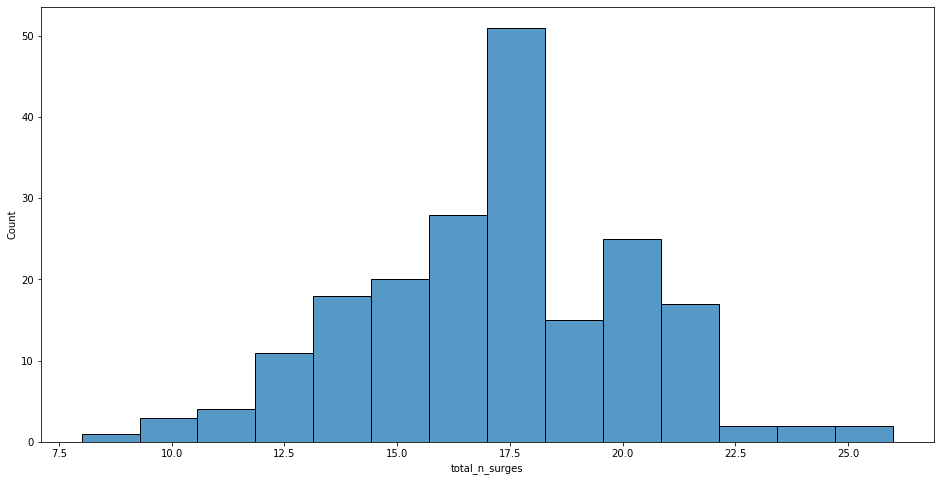

In [67]:
fig, ax = plt.subplots(ncols=1,figsize=(16,8))

sns.histplot(t1.total_n_surges, label='Zoning level 6')
sns.histplot(t2.total_n_surges, label='Zoning level 7')


In [58]:
t2 = surge_table

In [24]:
df = sim200_surge_16.res[0].pax_kpi
df.to_csv('pax_kpi_2006.csv')
df

,WAIT_TIME,nREJECTS,TRAVEL_TIME,LOST_PATIENCE,nP
sum,2.519473e+06,1192.000000,3.729653e+06,3474.000000,10000
mean,2.519473e+02,0.119200,3.729653e+02,0.347400,10000
std,1.920319e+02,0.368789,3.303865e+02,0.476168,10000


In [25]:
df = sim200_surge_16.res[0].pax_exp
df.to_csv('pax_exp_2006.csv')
df

,veh_id,WAIT_TIME,nREJECTS,TRAVEL_TIME,LOST_PATIENCE
pax,,,,,
0,552.0,250.0,0.0,354.0,False
1,Unfulfilled,195.0,0.0,0.0,True
2,Unfulfilled,195.0,0.0,0.0,True
3,336.0,328.0,0.0,686.0,False
4,Unfulfilled,195.0,0.0,0.0,True
...,...,...,...,...,...
9995,148.0,221.0,0.0,423.0,False
9996,Unfulfilled,195.0,0.0,0.0,True
9997,636.0,619.0,0.0,576.0,False


In [26]:
df = sim200_surge_16.res[0].veh_kpi
df.to_csv('veh_kpi_2006.csv')
df

,ACCEPTANCE_RATE,PROFIT,PROFIT/hour,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_DIST,AVE_DRIVING_DIST,DRIVING_TIME,AVE_PICKUP_DIST,AVE_TRIP_DIST,REVENUE,surge_fee,REVENUE/hour,COST,IMPOSED_DELAY,AR,nV
sum,16854.855243,51109.271000,6388.658875,165746.000000,7771.000000,6526.000000,1245.000000,52238.260000,1610.74605,5.223826e+06,462.952197,1147.793854,64168.836000,6361.000000,8021.104500,13059.565000,63743.000000,80-9070-8080-9090-10090-10080-9070-8080-9080-9...,200
mean,84.274276,255.546355,31.943294,828.730000,38.855000,32.630000,6.225000,261.191300,8.05373,2.611913e+04,2.314761,5.738969,320.844180,31.805000,40.105522,65.297825,318.715000,NaN,200
std,5.767579,16.500837,2.062605,246.480344,3.486366,2.466479,2.632303,4.494591,0.66874,4.494591e+02,0.409772,0.407075,16.431362,4.664306,2.053920,1.123648,180.380764,NaN,200


In [27]:
df = sim200_surge_16.res[0].veh_exp
df.to_csv('veh_exp_2006.csv')
df

,ACCEPTANCE_RATE,PROFIT,PROFIT/hour,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_DIST,AVE_DRIVING_DIST,DRIVING_TIME,AVE_PICKUP_DIST,AVE_TRIP_DIST,REVENUE,surge_fee,REVENUE/hour,COST,IMPOSED_DELAY,AR
veh,,,,,,,,,,,,,,,,,,
1,82.500000,262.5120,32.814000,835.0,40,33,7.0,263.04,7.970909,26304.0,2.181212,5.789697,328.272,33,41.0340,65.7600,314,80-90
2,78.571429,260.7265,32.590812,697.0,42,33,9.0,260.39,7.890606,26039.0,2.162727,5.727879,325.824,33,40.7280,65.0975,633,70-80
3,86.486486,240.0980,30.012250,512.0,37,32,5.0,262.84,8.213750,26284.0,2.671875,5.541875,305.808,29,38.2260,65.7100,159,80-90
4,97.297297,279.3365,34.917063,799.0,37,36,1.0,260.59,7.238611,26059.0,1.625556,5.613056,344.484,30,43.0605,65.1475,15,90-100
5,94.117647,261.7360,32.717000,371.0,34,32,2.0,265.84,8.307500,26584.0,2.312813,5.994688,328.196,34,41.0245,66.4600,173,90-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,80.952381,254.4570,31.807125,1323.0,42,34,8.0,252.94,7.439412,25294.0,2.103824,5.335588,317.692,32,39.7115,63.2350,456,80-90
197,73.333333,246.8465,30.855812,799.0,45,33,12.0,259.03,7.849394,25903.0,2.480606,5.368788,311.604,33,38.9505,64.7575,370,70-80
198,79.069767,261.6245,32.703063,1542.0,43,34,9.0,251.31,7.391471,25131.0,1.841176,5.550294,324.452,30,40.5565,62.8275,445,70-80


<AxesSubplot:xlabel='WAIT_TIME', ylabel='Count'>

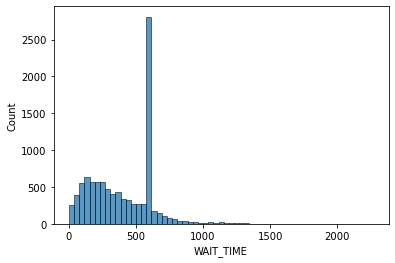

In [224]:
sns.histplot(pax.WAIT_TIME)

In [20]:
surge_list = []
for veh in range(1,params.nV+1):
    
    surge_list = surge_list + sim200_surge_17.vehs[veh].surge_fees
    
surge_list

[0,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 3,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 3,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 3,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 3,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 1,
 0,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 3,
 0,
 1,
 0,
 0,
 0,
 0,
 2,


In [22]:
for i in surge_list:
    if i>2:
        print(i)

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


In [ ]:
max_ds = 

math.ceil((3/(max_ds-1))*ds - (3/(max_ds-1)))

In [202]:
sim200.vehs

{1: <MaaSSim.driver.VehicleAgent at 0x1bf60359d00>,
 2: <MaaSSim.driver.VehicleAgent at 0x1c15a73c610>,
 3: <MaaSSim.driver.VehicleAgent at 0x1c15a73c0d0>,
 4: <MaaSSim.driver.VehicleAgent at 0x1c1564474c0>,
 5: <MaaSSim.driver.VehicleAgent at 0x1c156447910>,
 6: <MaaSSim.driver.VehicleAgent at 0x1c156447d60>,
 7: <MaaSSim.driver.VehicleAgent at 0x1c1564458e0>,
 8: <MaaSSim.driver.VehicleAgent at 0x1c156445a30>,
 9: <MaaSSim.driver.VehicleAgent at 0x1c1564456d0>,
 10: <MaaSSim.driver.VehicleAgent at 0x1c156445100>,
 11: <MaaSSim.driver.VehicleAgent at 0x1c15645bd90>,
 12: <MaaSSim.driver.VehicleAgent at 0x1c15645b970>,
 13: <MaaSSim.driver.VehicleAgent at 0x1c15645b370>,
 14: <MaaSSim.driver.VehicleAgent at 0x1c1564290d0>,
 15: <MaaSSim.driver.VehicleAgent at 0x1c1564294f0>,
 16: <MaaSSim.driver.VehicleAgent at 0x1c156429940>,
 17: <MaaSSim.driver.VehicleAgent at 0x1c156429d90>,
 18: <MaaSSim.driver.VehicleAgent at 0x1c156421d90>,
 19: <MaaSSim.driver.VehicleAgent at 0x1c156421af0>,
 2

In [209]:
max_ds = 60
ds = 45
math.ceil((3/(max_ds-1))*ds - (3/(max_ds-1)))

3

In [229]:
sim200_1.concat_sdf

,hex_address,cnt,demand,supply,D/S,surge_mp
0,871968240ffffff,11,0,0,0.0,0
1,871968241ffffff,12,0,0,0.0,0
2,871968244ffffff,12,0,0,0.0,0
3,871968245ffffff,30,0,0,0.0,0
4,871968248ffffff,34,0,0,0.0,0
...,...,...,...,...,...,...
50,871969c9effffff,536,0,3,0.0,0
51,871969cabffffff,5,0,0,0.0,0
52,871969cd0ffffff,95,0,0,0.0,0
53,871969cd2ffffff,13,0,0,0.0,0


In [46]:
sims = [sim200_16, sim200_26, sim200_36, sim200_46, sim200_56]
# sims = [sim200_1, sim200_2, sim200_3, sim200_4, sim200_5]

df = pd.DataFrame(index=sims[0].concat_sdf.groupby(['hex_address']).max().index)

for i in range(1,len(sims)+1):
    df['sim{}'.format(i)] = sims[i-1].concat_sdf.groupby(['hex_address']).max()['D/S']
    
df['ave_max'] = df.mean(axis=1)
print(df.ave_max.mean())
df.to_csv('max_ds_dfl6.csv')
# df.to_csv('max_ds_dfl7.csv')
df

15.700000000000001


,sim1,sim2,sim3,sim4,sim5,ave_max
hex_address,,,,,,
861968247ffffff,2.0,4.0,2.0,2.0,2.0,2.4
86196824fffffff,12.0,11.0,13.0,11.0,11.0,11.6
861968267ffffff,1.0,0.0,0.0,0.0,0.0,0.2
86196826fffffff,25.0,20.0,17.0,17.0,18.0,19.4
861969507ffffff,11.0,11.0,12.0,6.0,9.0,9.8
861969517ffffff,1.0,2.0,2.0,2.0,2.0,1.8
861969527ffffff,56.0,47.0,56.0,45.0,61.0,53.0
861969537ffffff,64.0,59.0,58.0,62.0,58.0,60.2
861969c87ffffff,4.0,4.0,2.0,2.0,2.0,2.8


In [43]:
def visualize_hexagons(hexagons, color="red", w=1, folium_map=None):
    """
    hexagons is a list of hexcluster. Each hexcluster is a list of hexagons. 
    eg. [[hex1, hex2], [hex3, hex4]]
    """
    polylines = []
    lat = []
    lng = []
    for hex in hexagons:
        polygons = h3.h3_set_to_multi_polygon([hex], geo_json=False)
        # flatten polygons into loops.
        outlines = [loop for polygon in polygons for loop in polygon]
        polyline = [outline + [outline[0]] for outline in outlines][0]
        lat.extend(map(lambda v:v[0],polyline))
        lng.extend(map(lambda v:v[1],polyline))
        polylines.append(polyline)
    
    if folium_map is None:
        m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron')
    else:
        m = folium_map
    for polyline in polylines:
        my_PolyLine=folium.PolyLine(locations=polyline,weight=w,color=color,fill= True)
        m.add_child(my_PolyLine)
    return m
    

def visualize_polygon(polyline, color):
    polyline.append(polyline[0])
    lat = [p[0] for p in polyline]
    lng = [p[1] for p in polyline]
    m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron')
    my_PolyLine=folium.PolyLine(locations=polyline,weight=8,color=color)
    m.add_child(my_PolyLine)
    return m

In [3]:
G = sim200.inData.G
fig, ax = ox.plot_graph(G, figsize=(10, 10), show=False, close=False, node_size=0, bgcolor='black', 
                        edge_color=(0.933, 0.65, 0.059))

NameError: name 'sim200' is not defined

In [1]:
# Visualiziation of hexagons on Amsterdam map
lat = []
lng = []
for i in G.nodes:
    lat.append(G.nodes[i]['y'])
    lng.append(G.nodes[i]['x'])
    
df = pd.DataFrame()
df['lat'] = lat
df['lng'] = lng

level = 7
hex_col = 'hex'+str(level)
df[hex_col] = df.apply(lambda x: h3.geo_to_h3(x.lat,x.lng,level),axis=1)
df = df.groupby(hex_col).size().to_frame('cnt').reset_index()

l = list(df[hex_col])
m = visualize_hexagons(l)
display(m)

NameError: name 'G' is not defined

In [46]:
hex_address = ['871969c9bffffff']
# hex_address = f.loc[f.bucket=='acc_above5'].zone.unique()
# hex_address = ['871969c9bffffff', '871969535ffffff', '871969534ffffff', '871969526ffffff', '871969522ffffff']
m = visualize_hexagons(hex_address)
display(m)

In [5]:
df = pd.read_csv('veh_exp_2007.csv')
df

,veh,ACCEPTANCE_RATE,PROFIT,PROFIT/hour,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_DIST,AVE_DRIVING_DIST,DRIVING_TIME,AVE_PICKUP_DIST,AVE_TRIP_DIST,REVENUE,surge_fee,REVENUE/hour,COST,IMPOSED_DELAY,AR
0,1,80.952381,258.3380,32.292250,530.0,42,34,8.0,262.28,7.714118,26228.0,2.079118,5.635000,323.908,26,40.4885,65.5700,467,80-90
1,2,88.888889,247.3540,30.919250,561.0,36,32,4.0,266.36,8.323750,26636.0,2.335625,5.988125,313.944,20,39.2430,66.5900,69,80-90
2,3,88.888889,248.2620,31.032750,789.0,36,32,4.0,260.28,8.133750,26028.0,2.239688,5.894063,313.332,23,39.1665,65.0700,112,80-90
3,4,87.500000,255.8985,31.987313,646.0,40,35,5.0,265.35,7.581429,26535.0,2.123429,5.458000,322.236,23,40.2795,66.3375,161,80-90
4,5,71.739130,253.1940,31.649250,585.0,46,33,13.0,258.36,7.829091,25836.0,2.076970,5.752121,317.784,24,39.7230,64.5900,700,70-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,74.358974,223.4115,27.926437,858.0,39,29,10.0,259.33,8.942414,25933.0,2.757241,6.185172,288.244,15,36.0305,64.8325,289,70-80
196,197,86.842105,256.1295,32.016188,894.0,38,33,5.0,257.69,7.808788,25769.0,1.885758,5.923030,320.552,20,40.0690,64.4225,248,80-90
197,198,96.875000,249.4880,31.186000,919.0,32,31,1.0,273.76,8.830968,27376.0,2.461935,6.369032,317.928,19,39.7410,68.4400,15,90-100
198,199,84.210526,232.0660,29.008250,627.0,38,32,6.0,269.96,8.436250,26996.0,2.822812,5.613437,299.556,20,37.4445,67.4900,268,80-90


In [12]:
df.REVENUE.sum() - df.COST.sum()

48764.8085

In [9]:
df.PROFIT.sum()

48764.8085

In [11]:
48764.8085-44472.8085

4292.0

In [13]:
df.surge_fee.sum()

4292

In [14]:
df = pd.read_csv('veh_kpi_2007.csv')
df

,Unnamed: 0,ACCEPTANCE_RATE,PROFIT,PROFIT/hour,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_DIST,AVE_DRIVING_DIST,DRIVING_TIME,AVE_PICKUP_DIST,AVE_TRIP_DIST,REVENUE,surge_fee,REVENUE/hour,COST,IMPOSED_DELAY,AR,nV
0,sum,16810.788713,48764.808500,6095.601062,160888.000000,7794.000000,6522.000000,1272.000000,52235.310000,1610.284328,5.223531e+06,468.550912,1141.733416,61823.636000,4292.000000,7727.954500,13058.827500,63608.000000,80-9080-9080-9080-9070-8080-9070-8070-8080-909...,200
1,mean,84.053944,243.824042,30.478005,804.440000,38.970000,32.610000,6.360000,261.176550,8.051422,2.611765e+04,2.342755,5.708667,309.118180,21.460000,38.639772,65.294137,318.040000,NaN,200
2,std,6.207495,14.764863,1.845608,239.828616,3.561252,2.307493,2.883047,4.527671,0.618778,4.527671e+02,0.360295,0.439578,14.904292,4.497727,1.863037,1.131918,188.085403,NaN,200


In [4]:
m = 5
ds = 3.5
surge_mp = round(4/(m-1))*ds + ((m-5)/(m-1))
surge_mp

3.5

In [6]:
round(2.444, 2)

2.44

In [60]:
df = pd.read_csv('veh_kpi_2007.csv')
df

,Unnamed: 0,ACCEPTANCE_RATE,PROFIT,PROFIT/hour,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_DIST,AVE_DRIVING_DIST,DRIVING_TIME,AVE_PICKUP_DIST,AVE_TRIP_DIST,REVENUE,surge_fee,REVENUE/hour,COST,IMPOSED_DELAY,AR,nV
0,sum,16810.788713,48764.808500,6095.601062,160888.000000,7794.000000,6522.000000,1272.000000,52235.310000,1610.284328,5.223531e+06,468.550912,1141.733416,61823.636000,4292.000000,7727.954500,13058.827500,63608.000000,80-9080-9080-9080-9070-8080-9070-8070-8080-909...,200
1,mean,84.053944,243.824042,30.478005,804.440000,38.970000,32.610000,6.360000,261.176550,8.051422,2.611765e+04,2.342755,5.708667,309.118180,21.460000,38.639772,65.294137,318.040000,NaN,200
2,std,6.207495,14.764863,1.845608,239.828616,3.561252,2.307493,2.883047,4.527671,0.618778,4.527671e+02,0.360295,0.439578,14.904292,4.497727,1.863037,1.131918,188.085403,NaN,200


In [59]:
df.PROFIT.sum()

AttributeError: 'DataFrame' object has no attribute 'PROFIT'

In [55]:
df.surge_fee.sum()

4292

In [63]:
2+1.2*5.708667

8.8504004